In [ ]:
# pip install anvil-uplink

In [ ]:
# import anvil.server

# anvil.server.connect("KBB2ZHGR7G6CC7DUXEY4RAQR-RH6S2ZQ3IGQM6I7C")

# @anvil.server.callable
# def get_nutrient_values(calories, protein, fat):
#   print("Hello from the uplink, %s!" % calories)

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
from sklearn.model_selection import KFold   
from sklearn.model_selection import cross_val_score

In [ ]:
df =pd.read_csv("/gdrive/Shareddrives/FYP Project/Dataset/FoodData_modified.csv")

In [ ]:
df

,Name,Group,Glycemic index,Insulin index,Serving Size,Acidity (Based on PRAL),GI Category,Calories (kcal),Net Carbs ( grams),Protein (g),...,Phenylalanine (mg),Valine (mg),Histidine (mg),Cholesterol (mg),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated fat (g),Starch (g),Fructose (g),Trans Fat (g)
0,"Bread, wheat, toasted",baked-products,60.0,100,1 oz (28.35 grams),4.9 (acidic),medium,313,51.07,12.96,...,0.32,0.31,0.15,0.0,0.99,1.02,1.72,NaN,NaN,NaN
1,"Biscuits, plain or buttermilk, prepared from r...",baked-products,44.0,48,1 oz (28.35 grams),3.4 (acidic),low,353,43.10,7.00,...,0.35,0.31,0.16,3.0,4.32,6.93,4.16,NaN,NaN,NaN
2,"Bread, french or vienna (includes sourdough)",baked-products,70.0,NaN,1 oz (28.35 grams),5.2 (acidic),medium,272,49.68,10.75,...,NaN,NaN,NaN,0.0,0.53,0.36,0.86,44.23,0.51,0.01
3,"Cake, chocolate, prepared from recipe without ...",baked-products,41.0,82,"1 piece (1/12 of 9"" dia) (95 grams)",2 (acidic),low,371,51.80,5.30,...,0.27,0.28,0.12,58.0,5.43,6.04,2.76,NaN,NaN,NaN
4,"Cake, fruitcake, commercially prepared",baked-products,53.0,NaN,1 piece (43 grams),-0.7 (alkaline),low,324,57.90,2.90,...,0.14,0.14,0.07,5.0,1.05,4.20,3.32,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,"Cabbage, napa, cooked",vegetables,32.0,NaN,1 cup (109 grams),-1.2 (alkaline),low,12,2.23,1.10,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00
622,"Grape leaves, raw",vegetables,NaN,NaN,1 leaf (3 grams),-6.8 (alkaline),NaN,93,6.31,5.60,...,NaN,NaN,NaN,0.0,0.34,0.08,1.07,NaN,NaN,0.00
623,"Peppers, ancho, dried",vegetables,NaN,NaN,1 pepper (17 grams),-41.1 (alkaline),NaN,281,29.82,11.86,...,0.36,0.49,0.23,0.0,0.82,0.49,4.51,NaN,NaN,0.00
624,"Epazote, raw",vegetables,NaN,NaN,1 tbsp (0.8 grams),-16.7 (alkaline),NaN,32,3.64,0.33,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00


In [ ]:
df.describe()

,Glycemic index,Calories (kcal),Net Carbs ( grams),Protein (g),Fats (g),Carbs (g),Net carbs (g),Sugar (g),Fiber (g),Calcium (mg),...,Phenylalanine (mg),Valine (mg),Histidine (mg),Cholesterol (mg),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated fat (g),Starch (g),Fructose (g),Trans Fat (g)
count,550.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,485.000000,581.000000,621.000000,...,427.000000,428.000000,426.000000,601.000000,597.000000,590.000000,590.000000,112.000000,184.000000,343.000000
mean,35.363636,216.998403,19.527412,8.220064,10.756198,22.770831,19.541757,9.053361,3.479174,107.190016,...,0.457611,0.521425,0.994038,30.079867,3.570285,4.307458,2.804780,12.125000,2.168859,0.124927
std,25.224070,188.224764,23.340832,9.186056,18.993655,25.012394,23.333177,16.763168,7.061645,308.883300,...,0.442380,0.511791,10.456163,87.005710,7.407209,9.187711,9.073928,18.773504,6.001451,0.863885
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,60.250000,2.532500,1.202500,0.300000,3.592500,2.532500,0.420000,0.000000,12.000000,...,0.080000,0.090000,0.040000,0.000000,0.050000,0.050000,0.090000,0.000000,0.040000,0.000000
50%,33.000000,165.500000,9.360000,4.145000,2.005000,13.050000,9.375000,2.500000,1.500000,30.000000,...,0.320000,0.320000,0.160000,0.000000,0.600000,0.595000,0.450000,1.745000,0.490000,0.000000
75%,54.000000,327.000000,28.497500,13.370000,13.887500,33.457500,28.497500,8.550000,3.300000,91.000000,...,0.750000,0.892500,0.460000,30.000000,3.680000,4.840000,1.922500,16.417500,1.565000,0.000000
max,104.000000,902.000000,99.980000,75.160000,100.000000,99.980000,99.980000,99.800000,70.100000,5876.000000,...,2.350000,2.310000,153.000000,1085.000000,82.480000,72.960000,153.000000,73.300000,55.600000,14.890000


In [ ]:
df.columns

Index(['Name', 'Group', 'Glycemic index', 'Insulin index', 'Serving Size',
       'Acidity (Based on PRAL)', 'GI Category', 'Calories (kcal)',
       'Net Carbs ( grams)', 'Protein (g)', 'Fats (g)', 'Carbs (g)',
       'Net carbs (g)', 'Sugar (g)', 'Fiber (g)', 'Calcium (mg)', 'Iron (mg)',
       'Magnesium (mg)', 'Phosphorus (mg)', 'Potassium (mg)', 'Sodium (mg)',
       'Zinc (mg)', 'Copper (mg)', 'Vitamin A (IU)', 'Vitamin E (mg)',
       'Vitamin D (µg)', 'Vitamin C (mg)', 'Vitamin B1 (mg)',
       'Vitamin B2 (mg)', 'Vitamin B3 (mg)', 'Vitamin B5 (mg)',
       'Vitamin B6 (mg)', 'Folate (µg)', 'Vitamin B12 (µg)', 'Vitamin K (µg)',
       'Tryptophan (mg)', 'Threonine (mg)', 'Isoleucine (mg)', 'Leucine (mg)',
       'Lysine (mg)', 'Methionine (mg)', 'Phenylalanine (mg)', 'Valine (mg)',
       'Histidine (mg)', 'Cholesterol (mg)', 'Saturated Fat (g)',
       'Monounsaturated Fat (g)', 'Polyunsaturated fat (g)', 'Starch (g)',
       'Fructose (g)', 'Trans Fat (g)'],
      dtype='obje

In [ ]:
df.dropna(subset = ['Glycemic index'], inplace=True)

In [ ]:
dataset = df.fillna(0)

In [ ]:
dataset['GI Category'] = dataset['GI Category'].map({'low':0, 'medium':1, 'high':2})

In [ ]:
train_columns = ["Calories (kcal)", 'Protein (g)','Fats (g)', 'Carbs (g)', 'Fiber (g)', 'Sugar (g)','Phosphorus (mg)', 'Potassium (mg)', 'Sodium (mg)', 'Saturated Fat (g)', 'Trans Fat (g)', 'GI Category']

In [ ]:
data = dataset[train_columns]

In [ ]:
data

,Calories (kcal),Protein (g),Fats (g),Carbs (g),Fiber (g),Sugar (g),Phosphorus (mg),Potassium (mg),Sodium (mg),Saturated Fat (g),Trans Fat (g),GI Category
0,313,12.96,4.27,55.77,4.7,6.42,188.0,223.0,601.0,0.99,0.00,1
1,353,7.00,16.30,44.60,1.5,2.18,164.0,121.0,580.0,4.32,0.00,0
2,272,10.75,2.42,51.88,2.2,4.62,105.0,117.0,602.0,0.53,0.01,1
3,371,5.30,15.10,53.40,1.6,0.00,106.0,140.0,315.0,5.43,0.00,0
4,324,2.90,9.10,61.60,3.7,27.42,52.0,153.0,101.0,1.05,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
617,17,0.85,0.29,3.53,0.4,2.58,19.0,217.0,10.0,0.02,0.00,0
618,23,1.10,0.30,5.10,1.9,2.71,17.0,158.0,14.0,0.05,0.00,0
620,22,1.14,0.72,3.81,2.5,0.84,41.0,261.0,7.0,0.11,0.00,0
621,12,1.10,0.17,2.23,0.0,0.00,19.0,87.0,11.0,0.00,0.00,0


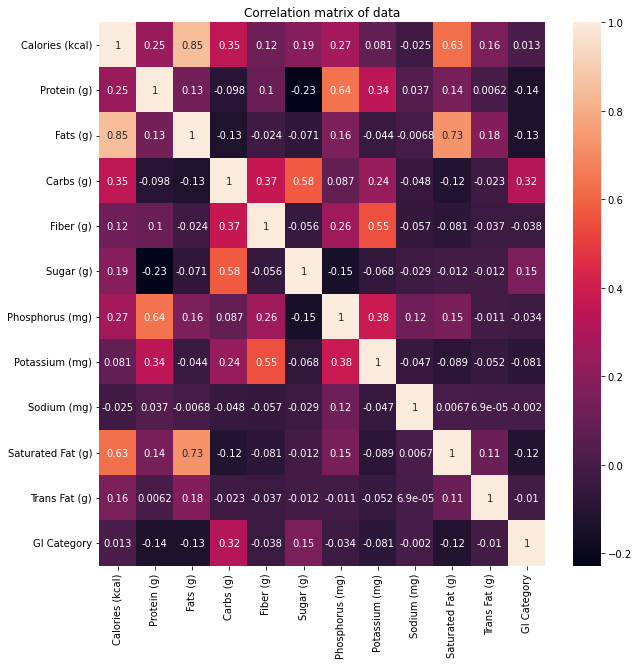

In [ ]:
# correlation matrix

import matplotlib.pyplot as plt

corrMatrix = data.corr()
plt.figure(figsize=(10, 10))
g2=sns.heatmap(corrMatrix, annot = True)
plt.title("Correlation matrix of data")
g2

In [ ]:
data['GI Category'].value_counts()

0    418
1     95
2     37
Name: GI Category, dtype: int64

In [ ]:
# separating the data and labels
X = data.drop(columns = 'GI Category', axis=1)  # axis = 1 (specify column)
Y = data['GI Category']

In [ ]:
print(X)  

     Calories (kcal)  Protein (g)  Fats (g)  Carbs (g)  Fiber (g)  Sugar (g)  \
0                313        12.96      4.27      55.77        4.7       6.42   
1                353         7.00     16.30      44.60        1.5       2.18   
2                272        10.75      2.42      51.88        2.2       4.62   
3                371         5.30     15.10      53.40        1.6       0.00   
4                324         2.90      9.10      61.60        3.7      27.42   
..               ...          ...       ...        ...        ...        ...   
617               17         0.85      0.29       3.53        0.4       2.58   
618               23         1.10      0.30       5.10        1.9       2.71   
620               22         1.14      0.72       3.81        2.5       0.84   
621               12         1.10      0.17       2.23        0.0       0.00   
625              284         9.25      0.73      73.01       70.1       0.00   

     Phosphorus (mg)  Potassium (mg)  S

In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      0
      ..
617    0
618    0
620    0
621    0
625    0
Name: GI Category, Length: 550, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# get standard scalar  z = (x - u) / s  ; u = mean , s = standard deviation (range - to + value depend on data)
scaler = StandardScaler()   #Standardize features by removing the mean and scaling to unit variance

In [ ]:
scaler.fit(X)  # Compute the mean and std to be used for later scaling.

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)   # Perform standardization by centering and scaling

In [ ]:
print(standardized_data)  # see standardized data

[[ 0.47682419  0.48855172 -0.35308521 ...  0.11214639 -0.34627843
  -0.10732219]
 [ 0.68706413 -0.15566812  0.26345183 ...  0.1019185   0.09076344
  -0.10732219]
 [ 0.26132825  0.24967155 -0.44789764 ...  0.11263343 -0.40665058
  -0.09253211]
 ...
 [-1.05267139 -0.78907891 -0.53502258 ... -0.17715681 -0.46177298
  -0.10732219]
 [-1.10523138 -0.79340253 -0.56321006 ... -0.17520864 -0.4762098
  -0.10732219]
 [ 0.32440023  0.08753568 -0.53451008 ... -0.16351962 -0.4762098
  -0.10732219]]


In [ ]:
# take standardize data for further processing 
X = standardized_data                 
Y = data['GI Category']

In [ ]:
print(X)
print(Y)

[[ 0.47682419  0.48855172 -0.35308521 ...  0.11214639 -0.34627843
  -0.10732219]
 [ 0.68706413 -0.15566812  0.26345183 ...  0.1019185   0.09076344
  -0.10732219]
 [ 0.26132825  0.24967155 -0.44789764 ...  0.11263343 -0.40665058
  -0.09253211]
 ...
 [-1.05267139 -0.78907891 -0.53502258 ... -0.17715681 -0.46177298
  -0.10732219]
 [-1.10523138 -0.79340253 -0.56321006 ... -0.17520864 -0.4762098
  -0.10732219]
 [ 0.32440023  0.08753568 -0.53451008 ... -0.16351962 -0.4762098
  -0.10732219]]
0      1
1      0
2      1
3      0
4      0
      ..
617    0
618    0
620    0
621    0
625    0
Name: GI Category, Length: 550, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# split ( make sure we split them roughly with equal patients and healthy into both sides )
# Test set size 20%
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(550, 11) (440, 11) (110, 11)


##Model1 using RandomForestClassifier

---



In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

#training Classifier
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)


#accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)


Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.7727272727272727


##Model2 using KNeighborsClassifier

---



In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

classifier =  KNeighborsClassifier()

#training Classifier
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)


#accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.8363636363636363
Accuracy score of the test data :  0.7545454545454545


##Model3 using DecisionTreeClassifier

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

classifier =  DecisionTreeClassifier()

#training Classifier
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)


#accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.7181818181818181


##Model4 using GradientBoostingClassifier

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

classifier =  GradientBoostingClassifier()

#training Classifier
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)


#accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.9954545454545455
Accuracy score of the test data :  0.7727272727272727


##Model5 using svm

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

classifier =  SVC()

#training Classifier
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)


#accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.7659090909090909
Accuracy score of the test data :  0.7636363636363637


##Model6 using GaussianNB

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB

classifier =  GaussianNB()

#training Classifier
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)


#accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.32954545454545453
Accuracy score of the test data :  0.35454545454545455


##Model7 using LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

classifier =  LogisticRegression()

#training Classifier
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)


#accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.75
Accuracy score of the test data :  0.7818181818181819


##Grid Search


                model  best_score                              best_params
0       random_forest    0.770909                        {'max_depth': 24}
1           kNeighbor    0.767273                       {'n_neighbors': 4}
2       decision_tree    0.760000  {'max_depth': 1, 'min_samples_leaf': 1}
3   gradient_boosting    0.760000                      {'n_estimators': 1}
4                 SVC    0.760000               {'C': 1, 'gamma': 'scale'}
5          GaussianNB    0.345455                                       {}
6  LogisticRegression    0.738182          {'C': 1, 'solver': 'newton-cg'}


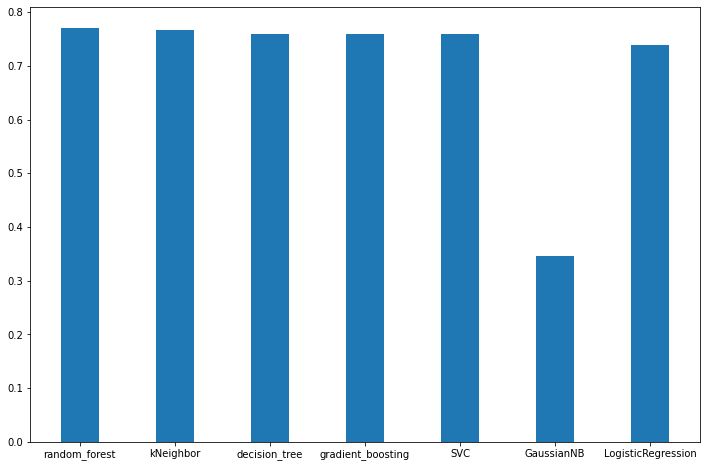

In [ ]:










import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold , cross_val_score, GridSearchCV

# define kfold
K = 10

models = {
    "random_forest" : {
        "model":RandomForestClassifier(),
        "params":{
            # "bootstrap": [True, False],
            "max_depth": range(20,40),             
            # "max_features": ["auto", "sqrt"],
            # "min_samples_leaf": range(1,10),
            # "min_samples_split": range(1,10),
            # "n_estimators": range(0, 1000, 25)
        }
    },
    "kNeighbor": {
        "model":KNeighborsClassifier(),
        "params":{
            'n_neighbors': range(1,30),     
            # 'leaf_size': range(1,50),
            # 'p': (1,2),
            # 'weights': ('uniform', 'distance'),
            # 'metric': ('minkowski', 'chebyshev'),
        }
    },
    "decision_tree": {
        "model":DecisionTreeClassifier(),
        "params":{
            # "criterion": ["gini", "entrophy"],
            "max_depth": range(1,20),          
            # "min_samples_split": range(1,10),
            "min_samples_leaf": range(1,5),    
        }
    },
    "gradient_boosting": {
        "model":GradientBoostingClassifier(),
        "params":{
            "n_estimators": range(1,10),
            # "max_depth":range(1,10),
            # "learning_rate":[0.05, 0.1, 0.2, 0.3,0.4,0.5]
        }
    },
    "SVC": {
        "model": SVC(),
        "params":{
            "gamma": ["scale", "auto"],
            "C": range(1,10),
        }
    },
    "GaussianNB": {
        "model": GaussianNB(),
        "params":{
            
        }
    },
    "LogisticRegression":{
        "model": LogisticRegression(),
        "params":{
            "solver": ["newton-cg", "lbfgs", "sag", "saga"],
            "C": range(1,10),
        }
    }
}


results = []
names = []

for name, model_param in models.items():

    # use Kfold
    kf = KFold(n_splits=K)
    # use cross validation
    search = GridSearchCV(estimator=model_param["model"], param_grid=model_param["params"], cv= kf,n_jobs=-1)
    search.fit(X, Y)
    results.append({
        "model": name,
        "best_score": search.best_score_,
        "best_params": search.best_params_
    })


#report

result_df = pd.DataFrame(results, columns=["model", "best_score", "best_params"])

print(result_df)

plt.figure(figsize=(12,8))
plt.bar(result_df["model"],result_df["best_score"], width=0.4)
plt.show()

##Model1 using RandomForestClassifier with k fold



In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# implementing k-fold cross validation  
k = 10  
k_fold = KFold(n_splits = k)  

classifier = RandomForestClassifier(max_depth = 29)

classifier.fit(X, Y)  
  
# finding accuracy scores using cross_val_score methods  
scores = cross_val_score(classifier, X, Y, cv = k_fold)  
  
# calculating mean accuracy score  
mean_acc_score = sum(scores) / len(scores)  
   
print("Accuracy score of each fold: ", scores)  
print("Mean accuracy score: ", mean_acc_score)  


Accuracy score of each fold:  [0.47272727 0.92727273 0.67272727 0.76363636 0.56363636 0.87272727
 0.96363636 0.92727273 0.63636364 0.8       ]
Mean accuracy score:  0.76


Ideal score:  0.78
Folds=2, accuracy=0.7582 (0.7491,0.7673)
Folds=3, accuracy=0.7655 (0.7432,0.7869)
Folds=4, accuracy=0.7818 (0.7591,0.8029)
Folds=5, accuracy=0.7709 (0.7455,0.7909)
Folds=6, accuracy=0.78 (0.7473,0.7935)
Folds=7, accuracy=0.7653 (0.7051,0.8101)
Folds=8, accuracy=0.7673 (0.7101,0.8116)
Folds=9, accuracy=0.7726 (0.7377,0.8226)
Folds=10, accuracy=0.78 (0.7455,0.8182)
Folds=11, accuracy=0.7836 (0.72,0.84)
Folds=12, accuracy=0.7746 (0.6739,0.8261)
Folds=13, accuracy=0.7835 (0.7143,0.8571)
Folds=14, accuracy=0.7817 (0.725,0.85)
Folds=15, accuracy=0.7745 (0.6944,0.8649)
Folds=16, accuracy=0.7764 (0.6765,0.8286)
Folds=17, accuracy=0.7762 (0.697,0.875)
Folds=18, accuracy=0.7835 (0.7,0.9032)
Folds=19, accuracy=0.7764 (0.6897,0.8276)
Folds=20, accuracy=0.769 (0.6296,0.8889)


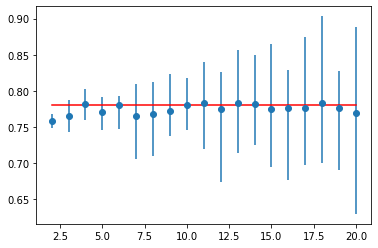

In [ ]:
# perform kfold cross-validation sensitivity analysis  

from numpy import mean  
from sklearn.datasets import make_classification  
from sklearn.model_selection import LeaveOneOut, KFold, cross_val_score  
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
   
  # getting the model object to be used for evaluation  
def get_model():  
    model = RandomForestClassifier(max_depth = 29) 
    return model  
   
# evaluating the model performance using a test condition  
def evaluate_model_performance(cv_method):  
    
    # getting the model  
    model = get_model()  
    # evaluating the model  
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv_method, n_jobs=-1)  
    # returning the mean, minimum and maximum scores  
    return round(mean(scores), 4), round(scores.min(), 4), round(scores.max(), 4)  
   
# calculating the ideal test condition  
ideal_score, _, _ = evaluate_model_performance(LeaveOneOut())  
print("Ideal score: ", ideal_score)  
  
# defining the number of folds to test  
folds = range(2, 21)  

# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()

# calculation accuracy for each k value in the defined range  
for k in folds:  
    # defining the test condition  
    cv_method = KFold(n_splits=k, shuffle=True, random_state=10)  
    # evaluating the k value  
    mean_k, min_k, max_k = evaluate_model_performance(cv_method)  
    # printing the performance of each k value  
    print(f"Folds={k}, accuracy={mean_k} ({min_k},{max_k})") 
    # store mean accuracy
    means.append(mean_k)
    # store min and max relative to the mean
    mins.append(mean_k - min_k)
    maxs.append(max_k - mean_k) 

# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal_score for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()

##Random Forest Hyperparameters

####Number of Samples

>0.1 0.759 (0.023)
>0.2 0.776 (0.037)
>0.3 0.775 (0.034)
>0.4 0.770 (0.043)
>0.5 0.784 (0.042)
>0.6 0.781 (0.043)
>0.7 0.772 (0.050)
>0.8 0.777 (0.042)
>0.9 0.772 (0.046)
>1.0 0.781 (0.045)


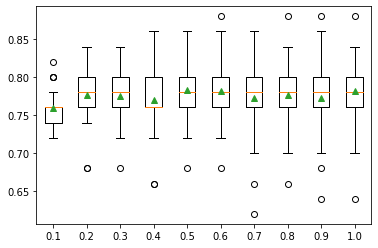

In [ ]:
# explore random forest bootstrap sample size on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
 models = dict()
 # explore ratios from 10% to 100% in 10% increments
 for i in arange(0.1, 1.1, 0.1):
  key = '%.1f' % i
  # set max_samples=None to use 100%
  if i == 1.0:
    i = None
  models[key] = RandomForestClassifier(max_samples=i)
 return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, Y):
 # define the evaluation procedure
 cv = RepeatedStratifiedKFold(n_splits=11, n_repeats=3, random_state=1)
 # evaluate the model and collect the results
 scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 # evaluate the model
 scores = evaluate_model(model, X, Y)
 # store the results
 results.append(scores)
 names.append(name)
 # summarize the performance along the way
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

####Number of features

>1 0.780 (0.042)
>2 0.781 (0.049)
>3 0.780 (0.041)
>4 0.775 (0.048)
>5 0.776 (0.048)
>6 0.776 (0.056)
>7 0.773 (0.059)
>8 0.772 (0.046)
>9 0.768 (0.053)
>10 0.774 (0.045)
>11 0.764 (0.052)


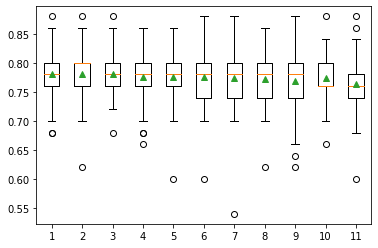

In [ ]:
# explore random forest number of features effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
# get a list of models to evaluate
def get_models():
 models = dict()
 # explore number of features from 1 to 11
 for i in range(1,12):
  models[str(i)] = RandomForestClassifier(max_features=i)
 return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, Y):
 # define the evaluation procedure
 cv = RepeatedStratifiedKFold(n_splits=11, n_repeats=3, random_state=1)
 # evaluate the model and collect the results
 scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 # evaluate the model
 scores = evaluate_model(model, X, Y)
 # store the results
 results.append(scores)
 names.append(name)
 # summarize the performance along the way
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

####Number of Trees

>10 0.758 (0.045)
>20 0.776 (0.044)
>30 0.770 (0.050)
>50 0.776 (0.048)
>100 0.779 (0.044)
>200 0.782 (0.047)
>300 0.778 (0.046)
>400 0.779 (0.048)
>500 0.778 (0.046)
>600 0.779 (0.047)
>700 0.779 (0.046)
>800 0.776 (0.050)
>900 0.781 (0.046)
>1000 0.778 (0.045)


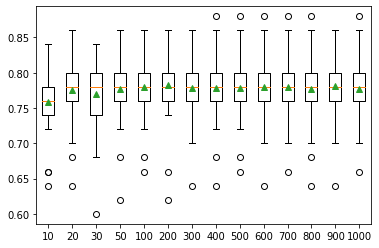

In [ ]:
# explore random forest number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

 
# get a list of models to evaluate
def get_models():
 models = dict()
 # define number of trees to consider
 n_trees = [10, 20, 30, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
 for n in n_trees:
  models[str(n)] = RandomForestClassifier(n_estimators=n)
 return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
 # define the evaluation procedure
 cv = RepeatedStratifiedKFold(n_splits=11, n_repeats=3, random_state=1)
 # evaluate the model and collect the results
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 # evaluate the model
 scores = evaluate_model(model, X, Y)
 # store the results
 results.append(scores)
 names.append(name)
 # summarize the performance along the way
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

##Model2 using KNeighborsClassifier with cross validation k fold

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

# implementing k-fold cross validation  
k = 10  
k_fold = KFold(n_splits = k)  

classifier = KNeighborsClassifier(n_neighbors = 4)

classifier.fit(X, Y)  
  
# finding accuracy scores using cross_val_score methods  
scores = cross_val_score(classifier, X, Y, cv = k_fold)  
  
# calculating mean accuracy score  
mean_acc_score = sum(scores) / len(scores)  
   
print("Accuracy score of each fold: ", scores)  
print("Mean accuracy score: ", mean_acc_score)  


Accuracy score of each fold:  [0.4        0.92727273 0.69090909 0.78181818 0.56363636 0.83636364
 0.96363636 0.92727273 0.78181818 0.8       ]
Mean accuracy score:  0.7672727272727272


Ideal score:  0.7782
Folds=2, accuracy=0.7491 (0.7345,0.7636)
Folds=3, accuracy=0.7764 (0.7541,0.8087)
Folds=4, accuracy=0.7764 (0.7445,0.8248)
Folds=5, accuracy=0.7618 (0.7455,0.8)
Folds=6, accuracy=0.7764 (0.75,0.8132)
Folds=7, accuracy=0.7673 (0.7179,0.7949)
Folds=8, accuracy=0.7673 (0.7246,0.8261)
Folds=9, accuracy=0.7782 (0.7541,0.8033)
Folds=10, accuracy=0.7727 (0.6909,0.8182)
Folds=11, accuracy=0.78 (0.72,0.84)
Folds=12, accuracy=0.7783 (0.7174,0.8261)
Folds=13, accuracy=0.7744 (0.7143,0.8333)
Folds=14, accuracy=0.7799 (0.7179,0.8205)
Folds=15, accuracy=0.7746 (0.6757,0.8378)
Folds=16, accuracy=0.7675 (0.6571,0.8571)
Folds=17, accuracy=0.7745 (0.6061,0.9394)
Folds=18, accuracy=0.7762 (0.6667,0.871)
Folds=19, accuracy=0.7764 (0.6897,0.8621)
Folds=20, accuracy=0.78 (0.6786,0.8929)


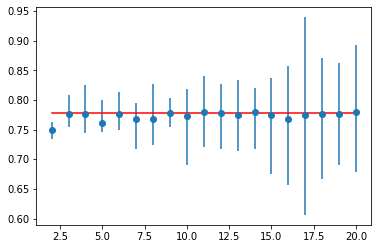

In [ ]:
# perform kfold cross-validation sensitivity analysis  

from numpy import mean  
from sklearn.datasets import make_classification  
from sklearn.model_selection import LeaveOneOut, KFold, cross_val_score  
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
   
  # getting the model object to be used for evaluation  
def get_model():  
    model = KNeighborsClassifier(n_neighbors = 4)
    return model  
   
# evaluating the model performance using a test condition  
def evaluate_model_performance(cv_method):  
    
    # getting the model  
    model = get_model()  
    # evaluating the model  
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv_method, n_jobs=-1)  
    # returning the mean, minimum and maximum scores  
    return round(mean(scores), 4), round(scores.min(), 4), round(scores.max(), 4)  
   
# calculating the ideal test condition  
ideal_score, _, _ = evaluate_model_performance(LeaveOneOut())  
print("Ideal score: ", ideal_score)  
  
# defining the number of folds to test  
folds = range(2, 21)  

# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()

# calculation accuracy for each k value in the defined range  
for k in folds:  
    # defining the test condition  
    cv_method = KFold(n_splits=k, shuffle=True, random_state=10)  
    # evaluating the k value  
    mean_k, min_k, max_k = evaluate_model_performance(cv_method)  
    # printing the performance of each k value  
    print(f"Folds={k}, accuracy={mean_k} ({min_k},{max_k})") 
    # store mean accuracy
    means.append(mean_k)
    # store min and max relative to the mean
    mins.append(mean_k - min_k)
    maxs.append(max_k - mean_k) 

# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal_score for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()

##Model3 using DecisionTreeClassifier with k fold

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# implementing k-fold cross validation  
k = 10  
k_fold = KFold(n_splits = k)  

classifier = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 1)

classifier.fit(X, Y)  
  
# finding accuracy scores using cross_val_score methods  
scores = cross_val_score(classifier, X, Y, cv = k_fold)  
  
# calculating mean accuracy score  
mean_acc_score = sum(scores) / len(scores)  
   
print("Accuracy score of each fold: ", scores)  
print("Mean accuracy score: ", mean_acc_score)  

Accuracy score of each fold:  [0.43636364 0.92727273 0.65454545 0.76363636 0.54545455 0.92727273
 0.94545455 0.92727273 0.67272727 0.8       ]
Mean accuracy score:  0.76


Ideal score:  0.76
Folds=2, accuracy=0.76 (0.76,0.76)
Folds=3, accuracy=0.7599 (0.7158,0.7935)
Folds=4, accuracy=0.76 (0.7174,0.8043)
Folds=5, accuracy=0.76 (0.7182,0.8182)
Folds=6, accuracy=0.76 (0.6957,0.8152)
Folds=7, accuracy=0.76 (0.7089,0.7975)
Folds=8, accuracy=0.7601 (0.7101,0.8261)
Folds=9, accuracy=0.7599 (0.6885,0.8065)
Folds=10, accuracy=0.76 (0.6545,0.8545)
Folds=11, accuracy=0.76 (0.68,0.86)
Folds=12, accuracy=0.7601 (0.6304,0.8261)
Folds=13, accuracy=0.7597 (0.5952,0.814)
Folds=14, accuracy=0.7597 (0.6667,0.85)
Folds=15, accuracy=0.7601 (0.6486,0.8919)
Folds=16, accuracy=0.7599 (0.6571,0.8571)
Folds=17, accuracy=0.7597 (0.5938,0.9394)
Folds=18, accuracy=0.7601 (0.5806,0.8387)
Folds=19, accuracy=0.76 (0.6207,0.8621)
Folds=20, accuracy=0.76 (0.6071,0.8889)


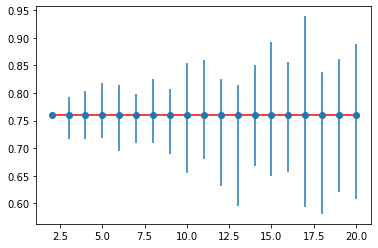

In [ ]:
# perform kfold cross-validation sensitivity analysis  

from numpy import mean  
from sklearn.datasets import make_classification  
from sklearn.model_selection import LeaveOneOut, KFold, cross_val_score  
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
   
  # getting the model object to be used for evaluation  
def get_model():  
    model = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 1)
    return model  
   
# evaluating the model performance using a test condition  
def evaluate_model_performance(cv_method):  
    
    # getting the model  
    model = get_model()  
    # evaluating the model  
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv_method, n_jobs=-1)  
    # returning the mean, minimum and maximum scores  
    return round(mean(scores), 4), round(scores.min(), 4), round(scores.max(), 4)  
   
# calculating the ideal test condition  
ideal_score, _, _ = evaluate_model_performance(LeaveOneOut())  
print("Ideal score: ", ideal_score)  
  
# defining the number of folds to test  
folds = range(2, 21)  
  
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()

# calculation accuracy for each k value in the defined range  
for k in folds:  
    # defining the test condition  
    cv_method = KFold(n_splits=k, shuffle=True, random_state=10)  
    # evaluating the k value  
    mean_k, min_k, max_k = evaluate_model_performance(cv_method)  
    # printing the performance of each k value  
    print(f"Folds={k}, accuracy={mean_k} ({min_k},{max_k})") 
    # store mean accuracy
    means.append(mean_k)
    # store min and max relative to the mean
    mins.append(mean_k - min_k)
    maxs.append(max_k - mean_k) 

# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal_score for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()

##Model4 using GradientBoostingClassifier with k fold

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

# implementing k-fold cross validation  
k = 10  
k_fold = KFold(n_splits = k)  

classifier = GradientBoostingClassifier(n_estimators = 1)

classifier.fit(X, Y)  
  
# finding accuracy scores using cross_val_score methods  
scores = cross_val_score(classifier, X, Y, cv = k_fold)  
  
# calculating mean accuracy score  
mean_acc_score = sum(scores) / len(scores)  
   
print("Accuracy score of each fold: ", scores)  
print("Mean accuracy score: ", mean_acc_score)  

Accuracy score of each fold:  [0.43636364 0.92727273 0.65454545 0.76363636 0.54545455 0.92727273
 0.94545455 0.92727273 0.67272727 0.8       ]
Mean accuracy score:  0.76


Ideal score:  0.76
Folds=2, accuracy=0.76 (0.76,0.76)
Folds=3, accuracy=0.7599 (0.7158,0.7935)
Folds=4, accuracy=0.76 (0.7174,0.8043)
Folds=5, accuracy=0.76 (0.7182,0.8182)
Folds=6, accuracy=0.76 (0.6957,0.8152)
Folds=7, accuracy=0.76 (0.7089,0.7975)
Folds=8, accuracy=0.7601 (0.7101,0.8261)
Folds=9, accuracy=0.7599 (0.6885,0.8065)
Folds=10, accuracy=0.76 (0.6545,0.8545)
Folds=11, accuracy=0.76 (0.68,0.86)
Folds=12, accuracy=0.7601 (0.6304,0.8261)
Folds=13, accuracy=0.7597 (0.5952,0.814)
Folds=14, accuracy=0.7597 (0.6667,0.85)
Folds=15, accuracy=0.7601 (0.6486,0.8919)
Folds=16, accuracy=0.7599 (0.6571,0.8571)
Folds=17, accuracy=0.7597 (0.5938,0.9394)
Folds=18, accuracy=0.7601 (0.5806,0.8387)
Folds=19, accuracy=0.76 (0.6207,0.8621)
Folds=20, accuracy=0.76 (0.6071,0.8889)


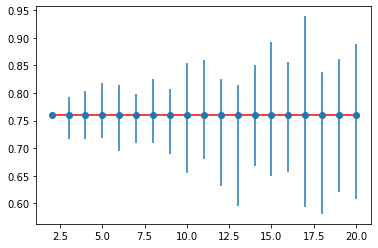

In [ ]:
# perform kfold cross-validation sensitivity analysis  

from numpy import mean  
from sklearn.datasets import make_classification  
from sklearn.model_selection import LeaveOneOut, KFold, cross_val_score  
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot
   
  # getting the model object to be used for evaluation  
def get_model():  
    model = GradientBoostingClassifier(n_estimators = 1)
    return model  
   
# evaluating the model performance using a test condition  
def evaluate_model_performance(cv_method):  
    
    # getting the model  
    model = get_model()  
    # evaluating the model  
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv_method, n_jobs=-1)  
    # returning the mean, minimum and maximum scores  
    return round(mean(scores), 4), round(scores.min(), 4), round(scores.max(), 4)  
   
# calculating the ideal test condition  
ideal_score, _, _ = evaluate_model_performance(LeaveOneOut())  
print("Ideal score: ", ideal_score)  
  
# defining the number of folds to test  
folds = range(2, 21)  
  
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()

# calculation accuracy for each k value in the defined range  
for k in folds:  
    # defining the test condition  
    cv_method = KFold(n_splits=k, shuffle=True, random_state=10)  
    # evaluating the k value  
    mean_k, min_k, max_k = evaluate_model_performance(cv_method)  
    # printing the performance of each k value  
    print(f"Folds={k}, accuracy={mean_k} ({min_k},{max_k})") 
    # store mean accuracy
    means.append(mean_k)
    # store min and max relative to the mean
    mins.append(mean_k - min_k)
    maxs.append(max_k - mean_k) 

# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal_score for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()

##Model5 using svm with k fold

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

# implementing k-fold cross validation  
k = 10  
k_fold = KFold(n_splits = k)  

classifier = SVC(C = 1, gamma = "scale")

classifier.fit(X, Y)  
  
# finding accuracy scores using cross_val_score methods  
scores = cross_val_score(classifier, X, Y, cv = k_fold)  
  
# calculating mean accuracy score  
mean_acc_score = sum(scores) / len(scores)  
   
print("Accuracy score of each fold: ", scores)  
print("Mean accuracy score: ", mean_acc_score)


Accuracy score of each fold:  [0.43636364 0.92727273 0.65454545 0.76363636 0.54545455 0.92727273
 0.94545455 0.92727273 0.67272727 0.8       ]
Mean accuracy score:  0.76


Ideal score:  0.7582
Folds=2, accuracy=0.7545 (0.7491,0.76)
Folds=3, accuracy=0.7599 (0.7104,0.7989)
Folds=4, accuracy=0.7618 (0.7174,0.8116)
Folds=5, accuracy=0.7582 (0.7182,0.8182)
Folds=6, accuracy=0.7582 (0.6957,0.8152)
Folds=7, accuracy=0.7582 (0.7089,0.7975)
Folds=8, accuracy=0.7546 (0.7101,0.8261)
Folds=9, accuracy=0.7581 (0.6885,0.8065)
Folds=10, accuracy=0.7582 (0.6545,0.8545)
Folds=11, accuracy=0.7582 (0.68,0.86)
Folds=12, accuracy=0.7583 (0.6304,0.8261)
Folds=13, accuracy=0.7579 (0.5952,0.814)
Folds=14, accuracy=0.7579 (0.6667,0.85)
Folds=15, accuracy=0.7583 (0.6486,0.8919)
Folds=16, accuracy=0.758 (0.6571,0.8571)
Folds=17, accuracy=0.7579 (0.5938,0.9394)
Folds=18, accuracy=0.7582 (0.5806,0.8387)
Folds=19, accuracy=0.7582 (0.6207,0.8621)
Folds=20, accuracy=0.7581 (0.6071,0.8889)


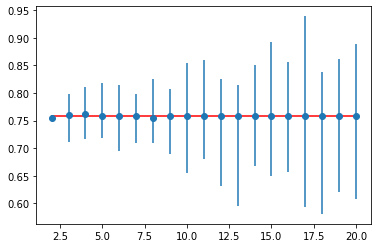

In [ ]:
# perform kfold cross-validation sensitivity analysis  

from numpy import mean  
from sklearn.datasets import make_classification  
from sklearn.model_selection import LeaveOneOut, KFold, cross_val_score  
from sklearn.svm import SVC
from matplotlib import pyplot
   
  # getting the model object to be used for evaluation  
def get_model():  
    model = SVC(C = 1, gamma = "scale")
    return model  
   
# evaluating the model performance using a test condition  
def evaluate_model_performance(cv_method):  
    
    # getting the model  
    model = get_model()  
    # evaluating the model  
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv_method, n_jobs=-1)  
    # returning the mean, minimum and maximum scores  
    return round(mean(scores), 4), round(scores.min(), 4), round(scores.max(), 4)  
   
# calculating the ideal test condition  
ideal_score, _, _ = evaluate_model_performance(LeaveOneOut())  
print("Ideal score: ", ideal_score)  
  
# defining the number of folds to test  
folds = range(2, 21)  
  
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()

# calculation accuracy for each k value in the defined range  
for k in folds:  
    # defining the test condition  
    cv_method = KFold(n_splits=k, shuffle=True, random_state=10)  
    # evaluating the k value  
    mean_k, min_k, max_k = evaluate_model_performance(cv_method)  
    # printing the performance of each k value  
    print(f"Folds={k}, accuracy={mean_k} ({min_k},{max_k})") 
    # store mean accuracy
    means.append(mean_k)
    # store min and max relative to the mean
    mins.append(mean_k - min_k)
    maxs.append(max_k - mean_k) 

# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal_score for _ in range(len(folds))], color='r')
# show the plot
pyplot.show() 

##Model6 using GaussianNB with k fold

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB

# implementing k-fold cross validation  
k = 10  
k_fold = KFold(n_splits = k)  

classifier = GaussianNB()

classifier.fit(X, Y)  
  
# finding accuracy scores using cross_val_score methods  
scores = cross_val_score(classifier, X, Y, cv = k_fold)  
  
# calculating mean accuracy score  
mean_acc_score = sum(scores) / len(scores)  
   
print("Accuracy score of each fold: ", scores)  
print("Mean accuracy score: ", mean_acc_score)

Accuracy score of each fold:  [0.23636364 0.41818182 0.25454545 0.2        0.38181818 0.25454545
 0.65454545 0.63636364 0.29090909 0.12727273]
Mean accuracy score:  0.3454545454545455


Ideal score:  0.2945
Folds=2, accuracy=0.3291 (0.3018,0.3564)
Folds=3, accuracy=0.4475 (0.3115,0.6995)
Folds=4, accuracy=0.3127 (0.2555,0.3551)
Folds=5, accuracy=0.3673 (0.2455,0.6091)
Folds=6, accuracy=0.3163 (0.2308,0.3587)
Folds=7, accuracy=0.3363 (0.2532,0.443)
Folds=8, accuracy=0.3126 (0.25,0.3623)
Folds=9, accuracy=0.3345 (0.2459,0.459)
Folds=10, accuracy=0.32 (0.2364,0.4)
Folds=11, accuracy=0.3273 (0.22,0.46)
Folds=12, accuracy=0.3143 (0.2,0.413)
Folds=13, accuracy=0.3074 (0.186,0.4524)
Folds=14, accuracy=0.3147 (0.2051,0.4872)
Folds=15, accuracy=0.2946 (0.1892,0.4167)
Folds=16, accuracy=0.3093 (0.2,0.4412)
Folds=17, accuracy=0.311 (0.1562,0.5)
Folds=18, accuracy=0.3127 (0.1,0.5)
Folds=19, accuracy=0.3124 (0.1429,0.4828)
Folds=20, accuracy=0.3127 (0.1481,0.4815)


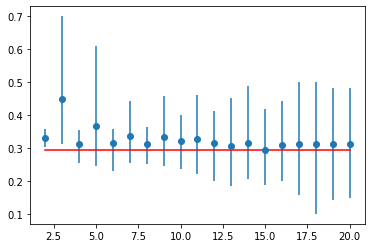

In [ ]:
# perform kfold cross-validation sensitivity analysis  

from numpy import mean  
from sklearn.datasets import make_classification  
from sklearn.model_selection import LeaveOneOut, KFold, cross_val_score  
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
   
  # getting the model object to be used for evaluation  
def get_model():  
    model = GaussianNB()
    return model  
   
# evaluating the model performance using a test condition  
def evaluate_model_performance(cv_method):  
    
    # getting the model  
    model = get_model()  
    # evaluating the model  
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv_method, n_jobs=-1)  
    # returning the mean, minimum and maximum scores  
    return round(mean(scores), 4), round(scores.min(), 4), round(scores.max(), 4)  
   
# calculating the ideal test condition  
ideal_score, _, _ = evaluate_model_performance(LeaveOneOut())  
print("Ideal score: ", ideal_score)  
  
# defining the number of folds to test  
folds = range(2, 21)  
  
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()

# calculation accuracy for each k value in the defined range  
for k in folds:  
    # defining the test condition  
    cv_method = KFold(n_splits=k, shuffle=True, random_state=10)  
    # evaluating the k value  
    mean_k, min_k, max_k = evaluate_model_performance(cv_method)  
    # printing the performance of each k value  
    print(f"Folds={k}, accuracy={mean_k} ({min_k},{max_k})") 
    # store mean accuracy
    means.append(mean_k)
    # store min and max relative to the mean
    mins.append(mean_k - min_k)
    maxs.append(max_k - mean_k) 

# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal_score for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()

##Model7 using LogisticRegression k fold

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# implementing k-fold cross validation  
k = 10  
k_fold = KFold(n_splits = k)  

classifier = LogisticRegression(C = 1, solver = "newton-cg")

classifier.fit(X, Y)  
  
# finding accuracy scores using cross_val_score methods  
scores = cross_val_score(classifier, X, Y, cv = k_fold)  
  
# calculating mean accuracy score  
mean_acc_score = sum(scores) / len(scores)  
   
print("Accuracy score of each fold: ", scores)  
print("Mean accuracy score: ", mean_acc_score)

Accuracy score of each fold:  [0.41818182 0.92727273 0.65454545 0.76363636 0.54545455 0.89090909
 0.94545455 0.89090909 0.54545455 0.8       ]
Mean accuracy score:  0.7381818181818182


Ideal score:  0.7418
Folds=2, accuracy=0.7364 (0.7309,0.7418)
Folds=3, accuracy=0.7436 (0.7158,0.7609)
Folds=4, accuracy=0.7436 (0.7101,0.7826)
Folds=5, accuracy=0.74 (0.7091,0.7818)
Folds=6, accuracy=0.7382 (0.6957,0.7826)
Folds=7, accuracy=0.7436 (0.6923,0.7949)
Folds=8, accuracy=0.7365 (0.6957,0.7794)
Folds=9, accuracy=0.7417 (0.6885,0.8065)
Folds=10, accuracy=0.7455 (0.6727,0.8182)
Folds=11, accuracy=0.7455 (0.68,0.82)
Folds=12, accuracy=0.7383 (0.6522,0.8222)
Folds=13, accuracy=0.7416 (0.619,0.8095)
Folds=14, accuracy=0.738 (0.6667,0.8462)
Folds=15, accuracy=0.7438 (0.6757,0.8333)
Folds=16, accuracy=0.7381 (0.6765,0.8235)
Folds=17, accuracy=0.738 (0.625,0.8485)
Folds=18, accuracy=0.7418 (0.6129,0.8333)
Folds=19, accuracy=0.7457 (0.6552,0.8571)
Folds=20, accuracy=0.74 (0.6429,0.8519)


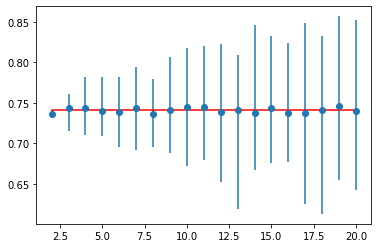

In [ ]:
# perform kfold cross-validation sensitivity analysis  

from numpy import mean  
from sklearn.datasets import make_classification  
from sklearn.model_selection import LeaveOneOut, KFold, cross_val_score  
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
   
  # getting the model object to be used for evaluation  
def get_model():  
    model = LogisticRegression(C = 1, solver = "newton-cg")
    return model  
   
# evaluating the model performance using a test condition  
def evaluate_model_performance(cv_method):  
    
    # getting the model  
    model = get_model()  
    # evaluating the model  
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv_method, n_jobs=-1)  
    # returning the mean, minimum and maximum scores  
    return round(mean(scores), 4), round(scores.min(), 4), round(scores.max(), 4)  
   
# calculating the ideal test condition  
ideal_score, _, _ = evaluate_model_performance(LeaveOneOut())  
print("Ideal score: ", ideal_score)  
  
# defining the number of folds to test  
folds = range(2, 21)  
  
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()

# calculation accuracy for each k value in the defined range  
for k in folds:  
    # defining the test condition  
    cv_method = KFold(n_splits=k, shuffle=True, random_state=10)  
    # evaluating the k value  
    mean_k, min_k, max_k = evaluate_model_performance(cv_method)  
    # printing the performance of each k value  
    print(f"Folds={k}, accuracy={mean_k} ({min_k},{max_k})") 
    # store mean accuracy
    means.append(mean_k)
    # store min and max relative to the mean
    mins.append(mean_k - min_k)
    maxs.append(max_k - mean_k) 

# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal_score for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()

##Final Model according to k fold


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# implementing k-fold cross validation  
k = 11
k_fold = KFold(n_splits = k)  

classifier = RandomForestClassifier(n_estimators = 100, max_depth = 29, max_features = 4, max_samples = 1.0)

classifier.fit(X, Y)  
  
# finding accuracy scores using cross_val_score methods  
scores = cross_val_score(classifier, X, Y, cv = k_fold)  
  
# calculating mean accuracy score  
mean_acc_score = sum(scores) / len(scores)  
   
print("Accuracy score of each fold: ", scores)  
print("Mean accuracy score: ", mean_acc_score)  


Accuracy score of each fold:  [0.4  0.94 0.68 0.72 0.7  0.74 0.9  0.96 0.9  0.62 0.82]
Mean accuracy score:  0.7618181818181818
